# Logstic Regression course

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [6]:
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']

In [7]:
print(np.percentile(price, 66))
greater_then_most = np.percentile(price, 66)

23.53


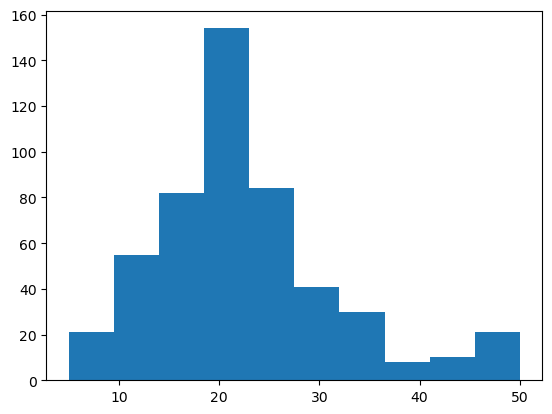

In [8]:
plt.hist(price)
plt.show()

In [10]:
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
expensive = dataframe['expensive']

# print(dataframe.head())
print(dataframe['expensive'])

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: expensive, Length: 506, dtype: int64


In [14]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)

def loss(yhat, y):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])

def partial_b(x, y, yhat):
    return np.sum((yhat - y))

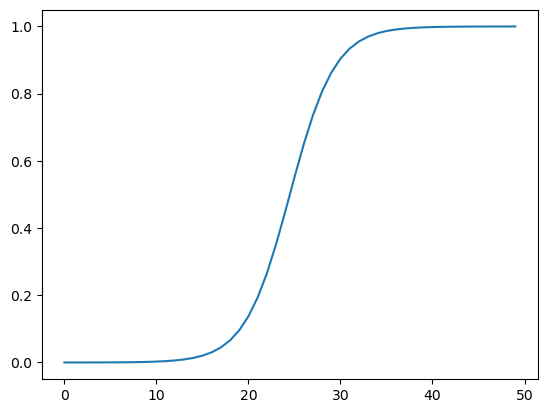

In [15]:
import matplotlib.pyplot as plt
plt.plot(logistic(np.linspace(-10, 10)))
plt.show()

In [18]:
w = np.random.random_sample((1, 2))
b = 0

In [29]:
learning_rate = 1e-5
epoch = 200
losses = []

history_k_b_loss = []

for i in range(epoch):
    batch_loss = []
    for batch in range(len(rm)):
        index = random.choice(range(len(rm)))

        x = np.array([rm[index], lstat[index]])
        y = expensive[index]

        yhat = model(x, w, b)
        loss_v = loss(yhat, y)

        w = w + -1 * partial_w(x, y, yhat) * learning_rate
        b = b + -1 * partial_b(x, y, yhat) * learning_rate

        batch_loss.append(loss_v)
        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss:{}'.format(i, batch, loss_v))
    losses.append(np.mean(batch_loss))

Epoch: 0, Batch: 0, loss:0.34939807739067374
Epoch: 0, Batch: 100, loss:0.0006509247183802067
Epoch: 0, Batch: 200, loss:0.27963646681041965
Epoch: 0, Batch: 300, loss:0.4676213240952043
Epoch: 0, Batch: 400, loss:0.798791427249365
Epoch: 0, Batch: 500, loss:0.06767136694452602
Epoch: 1, Batch: 0, loss:0.31813675523608065
Epoch: 1, Batch: 100, loss:0.015920704777346587
Epoch: 1, Batch: 200, loss:0.017610436358159343
Epoch: 1, Batch: 300, loss:0.13953152703009594
Epoch: 1, Batch: 400, loss:0.011174818743764884
Epoch: 1, Batch: 500, loss:0.41601286817298266
Epoch: 2, Batch: 0, loss:0.3040251141820586
Epoch: 2, Batch: 100, loss:0.03805289600259062
Epoch: 2, Batch: 200, loss:0.06485753863905198
Epoch: 2, Batch: 300, loss:0.1896597427846354
Epoch: 2, Batch: 400, loss:0.023824895743121192
Epoch: 2, Batch: 500, loss:0.018287004798064277
Epoch: 3, Batch: 0, loss:0.00704232271164933
Epoch: 3, Batch: 100, loss:0.9156284543063135
Epoch: 3, Batch: 200, loss:0.03890029225029358
Epoch: 3, Batch: 300

In [30]:
random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5

for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], expensive[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM:{}, LSTAT:{}, EXPENSIVE:{}, Predicated:{}'.format(x1, x2, y, predicate_label))

RM:6.38, LSTAT:24.08, EXPENSIVE:0, Predicated:0
RM:6.728, LSTAT:4.5, EXPENSIVE:1, Predicated:1
RM:5.803, LSTAT:14.64, EXPENSIVE:0, Predicated:0
RM:5.155, LSTAT:20.08, EXPENSIVE:0, Predicated:0
RM:6.458, LSTAT:12.6, EXPENSIVE:0, Predicated:0
RM:6.375, LSTAT:9.38, EXPENSIVE:1, Predicated:0
RM:6.113, LSTAT:12.73, EXPENSIVE:0, Predicated:0
RM:6.167, LSTAT:7.51, EXPENSIVE:0, Predicated:1
RM:5.762, LSTAT:10.42, EXPENSIVE:0, Predicated:0
RM:5.935, LSTAT:34.02, EXPENSIVE:0, Predicated:0
RM:6.482, LSTAT:7.19, EXPENSIVE:1, Predicated:1
RM:5.96, LSTAT:17.27, EXPENSIVE:0, Predicated:0
RM:5.966, LSTAT:14.44, EXPENSIVE:0, Predicated:0
RM:6.25, LSTAT:5.5, EXPENSIVE:1, Predicated:1
RM:6.169, LSTAT:5.81, EXPENSIVE:1, Predicated:1
RM:6.794, LSTAT:21.24, EXPENSIVE:0, Predicated:0
RM:5.572, LSTAT:14.69, EXPENSIVE:0, Predicated:0
RM:6.616, LSTAT:8.93, EXPENSIVE:1, Predicated:0
RM:6.726, LSTAT:8.05, EXPENSIVE:1, Predicated:1
RM:7.241, LSTAT:5.49, EXPENSIVE:1, Predicated:1
RM:6.242, LSTAT:10.74, EXPENSIVE:0,

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_2028/1902039918.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicate_label = int(predicate > decision_boundary)
